In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Предварительное исследование данных и предобработка

Загружаем имеющиеся данные и смотрим на них

In [193]:
data = pd.read_excel('data.xlsx')
data.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [194]:
data.shape

(730, 8)

Проверим есть ли какая-либо информация в столюце 'Unnamed: 5'

In [195]:
data['Unnamed: 5'].isna().sum()

730

В столбце все значения пропущенные, поэтому можно его убрать

In [196]:
data = data.drop(columns='Unnamed: 5')

Также у нас есть специфическая первая строка с датой в колонке status, посмотрим какие еще значения содержатся в данной колонке

In [197]:
data.status.value_counts()

status
ОПЛАЧЕНО         622
ПРОСРОЧЕНО        52
В РАБОТЕ          44
НА ПОДПИСАНИИ      5
Май 2021           1
ВНУТРЕННИЙ         1
Июнь 2021          1
Июль 2021          1
Август 2021        1
Сентябрь 2021      1
Октябрь 2021       1
Name: count, dtype: int64

Некоторые строки в данной колонке содержат информацию о месяце сделок следующих за данной строкой, необходимо создать для месяца отдельную колонку

In [198]:
# Создаем список со всеми возможными месяцами
months = []
for i in data.status.value_counts().index:
    if i.endswith('2021'):
        months.append(i)
        
# Создаем новый столбец с месяцем, вносим в него значения и удаляем лишние строки        
data['month'] = ''
for month in months:
    indx = data.query('status == @month').index[0]
    data.loc[indx + 1:, 'month'] = month
    data = data.drop(index=indx)
                     
# Проверяем все ли убралось
data.status.value_counts()

status
ОПЛАЧЕНО         622
ПРОСРОЧЕНО        52
В РАБОТЕ          44
НА ПОДПИСАНИИ      5
ВНУТРЕННИЙ         1
Name: count, dtype: int64

Также проверяем новый столбец

In [199]:
data.month.value_counts()

month
Октябрь 2021     135
Май 2021         128
Июнь 2021        128
Август 2021      114
Июль 2021        110
Сентябрь 2021    109
Name: count, dtype: int64

Отлично, идем дальше

Посмотрим на описательные статистики количественных переменных

In [200]:
data.describe()

,client_id,sum
count,724.000000,724.000000
mean,183.084254,7162.542030
std,106.590761,6308.571297
min,6.000000,23.700000
25%,86.000000,3114.732500
50%,194.000000,5207.990000
75%,273.000000,8934.950000
max,398.000000,39713.500000


С количественными переменными все в порядке

Посмотрим на значения в столбцах new/current, document

In [201]:
data['new/current'].value_counts()

new/current
текущая    620
новая      103
-            1
Name: count, dtype: int64

In [202]:
data['document'].value_counts()

document
оригинал    595
НЕТ         113
-             1
Name: count, dtype: int64

Одна из строчек содержит информацию о внутреннем платеже, для которого известна только сумма. Не будем учитывать данное поступление, так как не располагаем достаточной информацией

In [203]:
data = data[data.status != 'ВНУТРЕННИЙ']

Посмотрим, остались ли пропущенные значения

In [204]:
data.isna().sum()

client_id           0
sum                 0
status              0
sale                0
new/current         0
document           15
receiving_date    117
month               0
dtype: int64

In [205]:
data[data.document.isna()]

,client_id,sum,status,sale,new/current,document,receiving_date,month
47,87.0,9948.7,ОПЛАЧЕНО,Смирнов,новая,NaN,2021-06-17 00:00:00,Май 2021
48,90.0,16123.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-28 00:00:00,Май 2021
49,91.0,1053.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-28 00:00:00,Май 2021
93,198.0,4458.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-01 00:00:00,Май 2021
189,115.0,298.7,ОПЛАЧЕНО,Андреев,текущая,NaN,2021-07-14 00:00:00,Июнь 2021
337,228.0,2193.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-10-06 00:00:00,Июль 2021
376,32.0,7101.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,2021-10-06 00:00:00,Август 2021
409,90.0,8454.2,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-09-20 00:00:00,Август 2021
453,339.0,7553.7,ОПЛАЧЕНО,Петрова,новая,NaN,2021-10-11 00:00:00,Август 2021
459,256.0,2351.2,ОПЛАЧЕНО,Филимонова,текущая,NaN,NaN,Август 2021


In [206]:
data[data.receiving_date.isna()].head(10)

,client_id,sum,status,sale,new/current,document,receiving_date,month
248,266.0,3363.7,ОПЛАЧЕНО,Петрова,текущая,НЕТ,NaN,Июнь 2021
261,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaN,Июль 2021
358,266.0,3363.7,ОПЛАЧЕНО,Петрова,текущая,НЕТ,NaN,Июль 2021
366,284.0,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN,Июль 2021
381,322.0,19953.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN,Август 2021
383,323.0,19953.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN,Август 2021
427,175.0,5678.7,ПРОСРОЧЕНО,Андреев,текущая,НЕТ,NaN,Август 2021
459,256.0,2351.2,ОПЛАЧЕНО,Филимонова,текущая,NaN,NaN,Август 2021
460,256.0,1966.2,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN,Август 2021
468,266.0,3453.7,ОПЛАЧЕНО,Петрова,текущая,НЕТ,NaN,Август 2021


In [207]:
data.query('document == "оригинал" and receiving_date.isna()')

,client_id,sum,status,sale,new/current,document,receiving_date,month


Пропущенное значение в receiving_date возникает только в случае отсутствия оригинала договора, что логично, значит здесь проблем нет. Однако, существуют случае когда дата получения оригинала отображается, но в сстолбце с наличием оригинала стоит пропущенное значение, что может быть связано с ошибкой в заполнении данных. В Нашем случае наличие оригинала договора не имеет значения, поэтому не будем убирать данные строки из анализа, но необходимо обратить внимание на данный недочет в данных.

Далее посмотрим на наличие дубликатов в данных

In [208]:
data[data.duplicated()]

,client_id,sum,status,sale,new/current,document,receiving_date,month
19,43.0,1961.2,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-27 00:00:00,Май 2021
53,96.0,1266.2,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-07-16 00:00:00,Май 2021
98,204.0,1473.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-07-01 00:00:00,Май 2021
180,97.0,1506.2,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-09-01 00:00:00,Июнь 2021
224,204.0,1523.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-07-21 00:00:00,Июнь 2021
275,311.0,2063.7,ОПЛАЧЕНО,Соколов,текущая,оригинал,2021-09-28 00:00:00,Июль 2021
332,204.0,1611.2,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-20 00:00:00,Июль 2021
351,319.0,4208.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-09-21 00:00:00,Июль 2021
442,204.0,1611.2,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-09-16 00:00:00,Август 2021
462,319.0,4561.2,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-10-21 00:00:00,Август 2021


В данных присутствует достаточно много дубликатов, необходимо от них избавиться. Также посмотрим сразу на типы данных, чтобы понять все ли с нимим хорошо

In [209]:
data = data.drop_duplicates()
data.dtypes

client_id         float64
sum               float64
status             object
sale               object
new/current        object
document           object
receiving_date     object
month              object
dtype: object

Необходимо поменять тип данных для даты, чтобы в дальнейшем можно было с ней работать.
И посмотрим на итоговую таблицу

In [210]:
data['receiving_date'] = pd.to_datetime(data.receiving_date)
data.head()

,client_id,sum,status,sale,new/current,document,receiving_date,month
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,Май 2021
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,Май 2021


В остальном с данными все хорошо, переходим к вопросам и заданиям

## Вопросы

1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [211]:
sum_jul = round(data.query('month == "Июль 2021" and status != "ПРОСРОЧЕНО"')['sum'].sum(), 2)
print(f" Общая выручка за июль = {sum_jul}")

 Общая выручка за июль = 852012.87


2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

Так как данная таблица содержит данные по поступлению денежных средств, будем считать что средства по любому статусу поступили и соответственно составляют выручку

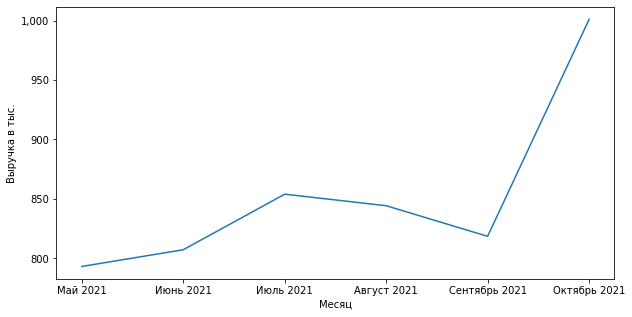

In [212]:
plt.figure(figsize=(10, 5))
sns.lineplot(data \
    .groupby('month') \
    .agg({'sum': 'sum'}) \
    .reindex(['Май 2021', 'Июнь 2021', 'Июль 2021', 'Август 2021', 'Сентябрь 2021', 'Октябрь 2021']), legend=False)
plt.xlabel('Месяц')
plt.ylabel('Выручка в тыс.')
formatter = FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)

Выручка росла с мая по июль, затем до сентября наблюдается снижение, а в октябре большой скачок

3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

In [213]:
data.query('month == "Сентябрь 2021"').groupby('sale').agg({'sum': 'sum'}).sort_values('sum', ascending=False)

,sum
sale,
Смирнов,220672.00
Петрова,149344.46
Андреев,132646.30
Иванов,94770.60
Кузнецова,72228.40
Филимонова,59514.47
Васильев,49895.45
Соколов,35183.50
Михайлов,4268.70


Больше всего денежных средств в сентябре 2021 привлек менеджер **Смирнов**

4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [214]:
data.query('month == "Октябрь 2021"')['new/current'].value_counts()

new/current
текущая    98
новая      35
Name: count, dtype: int64

В октябре 2021 преобладали **текущие** сделки

5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [239]:
docs = data[(data.month == 'Май 2021') & (data.receiving_date.dt.month == 6) & (data.receiving_date.dt.year == 2021)].shape[0]
print(f'{docs} оригиналов договора по майским сделкам было получено в июне 2021')

77 оригиналов договора по майским сделкам было получено в июне 2021


## Задания

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс., и 3 % от суммы, если меньше. При этом статус оплаты может быть любым, кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого месяца, считаются остатком на следующий период, который выплачивается по мере прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

Посчитаем бонус по каждой сделке

In [242]:
def count_bonus(row):
    if row.document == 'оригинал':
        if (row['new/current'] == 'новая') and (row.status == 'ОПЛАЧЕНО'):
            return row['sum'] * 0.07
        elif (row['new/current'] == 'текущая') and (row.status != 'ПРОСРОЧЕНО'):
            if row['sum'] > 10000:
                return row['sum'] * 0.05
            else:
                return row['sum'] * 0.03
        else:
            return 0
    else: 
        return 0
    
data['bonus'] = data.apply(count_bonus, axis=1)

Чтобы посчитать остаток на 1 июля 2021 года, необходимо посмотреть, по каким сделкам, совершенным в мае и июне, договоры пришли позже 30 июня (так как остатки по договорам, которые пришли 1 июля будут выплачиваться уже в этом месяце, а значит тоже являются остатками).

In [252]:
data.query('month.isin(["Май 2021", "Июнь 2021"]) and receiving_date > "2021-06-30"') \
    .groupby('sale').agg({'bonus': 'sum'}).rename(columns={'bonus': 'balance_july_1'})

,balance_july_1
sale,
Андреев,3855.9077
Васильев,953.8770
Иванов,5991.4520
Кузнецова,4496.9501
Петрова,10770.7474
Селиванов,5238.8540
Смирнов,6430.2650
Соколов,269.2110
Филимонова,2317.9579
